In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')

## Capacity 1

In [3]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization
0,20,1,13,166.829144,179.344176,177.281744
1,20,1,13,179.129187,186.580934,186.302290
2,20,1,13,156.701896,166.910643,165.384221
3,20,1,13,171.042922,172.201296,172.067194
4,20,1,13,170.421172,182.047027,179.962218


In [4]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['distance_after_obstacle_avoidance'].mean())

Average distance with no obstacle 				: 259.32059967659484
Average distance with obstacle avoidance 			: 271.9546571711001


In [5]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization
13,40,1,13,325.410146,339.594035,338.197823
14,40,1,13,318.221430,333.087008,331.435911
15,50,1,13,427.114656,438.020969,437.926781
16,50,1,13,425.728717,451.940699,451.678644
17,50,1,13,383.412440,399.353881,398.079869


In [6]:
df_cap_1['rho_obstacle_free'] = df_cap_1['obstacle_free_distance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_distance_after_obstacle_avoidance'] = df_cap_1['distance_after_obstacle_avoidance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_distance_after_dp_optimization'] = df_cap_1['distance_after_dp_optimization']/df_cap_1['obstacle_free_distance']

df_cap_1.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization,rho_obstacle_free,rho_distance_after_obstacle_avoidance,rho_distance_after_dp_optimization
0,20,1,13,166.829144,179.344176,177.281744,1.0,1.075017,1.062655
1,20,1,13,179.129187,186.580934,186.302290,1.0,1.041600,1.040044
2,20,1,13,156.701896,166.910643,165.384221,1.0,1.065148,1.055407
3,20,1,13,171.042922,172.201296,172.067194,1.0,1.006772,1.005988
4,20,1,13,170.421172,182.047027,179.962218,1.0,1.068218,1.055985


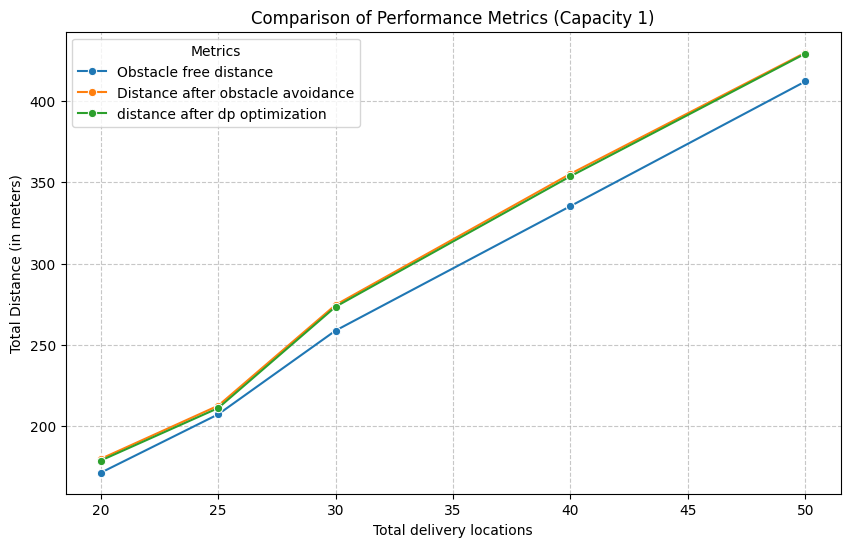

In [7]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='obstacle_free_distance', label='Obstacle free distance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_obstacle_avoidance', label='Distance after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_dp_optimization', label='distance after dp optimization', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

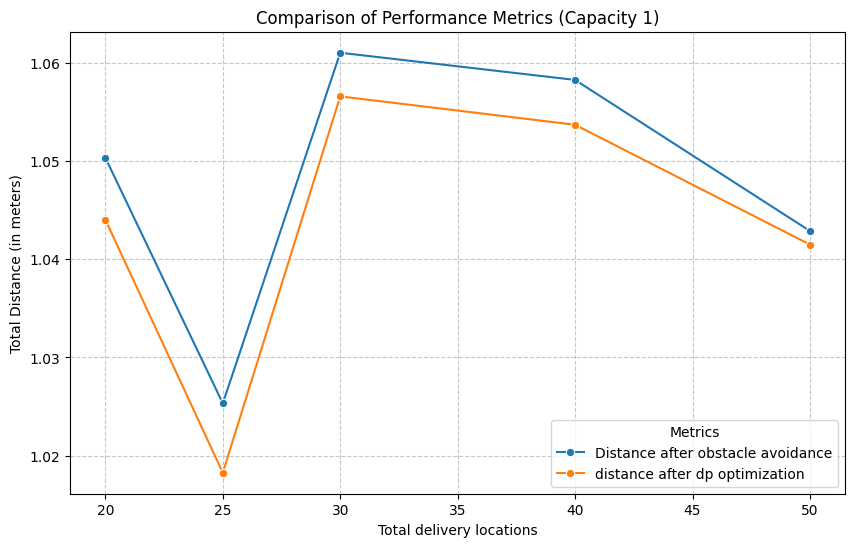

In [23]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_distance_after_obstacle_avoidance', label='Distance after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_distance_after_dp_optimization', label='distance after dp optimization', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Capacity K

In [9]:
df_cap_k = pd.read_csv('./drone_performance_on_obstacle_capacity_k.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance
0,25,5,13,76.938505,85.712216,82.209207
1,25,5,13,75.209227,82.648294,79.161673
2,25,5,13,67.989373,76.599275,74.458829
3,25,5,13,82.060355,95.783066,91.010909
4,25,5,13,76.028111,77.196335,78.973533


In [10]:
df_cap_k['rho_greedy'] = df_cap_k['greedy_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_christofides'] = df_cap_k['christofides_distance']/df_cap_k['obstacle_free_distance']

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance,rho_greedy,rho_christofides
0,25,5,13,76.938505,85.712216,82.209207,1.114035,1.068505
1,25,5,13,75.209227,82.648294,79.161673,1.098912,1.052553
2,25,5,13,67.989373,76.599275,74.458829,1.126636,1.095154
3,25,5,13,82.060355,95.783066,91.010909,1.167227,1.109073
4,25,5,13,76.028111,77.196335,78.973533,1.015366,1.038741


In [11]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with greedy technique \t\t\t\t:",df_cap_k['greedy_distance'].mean())
print("Average distance with christofides technique \t\t\t:",df_cap_k['christofides_distance'].mean())

Average distance with no obstacle 				: 105.9984449870173
Average distance with greedy technique 				: 113.77915017411094
Average distance with christofides technique 			: 111.4731761510813


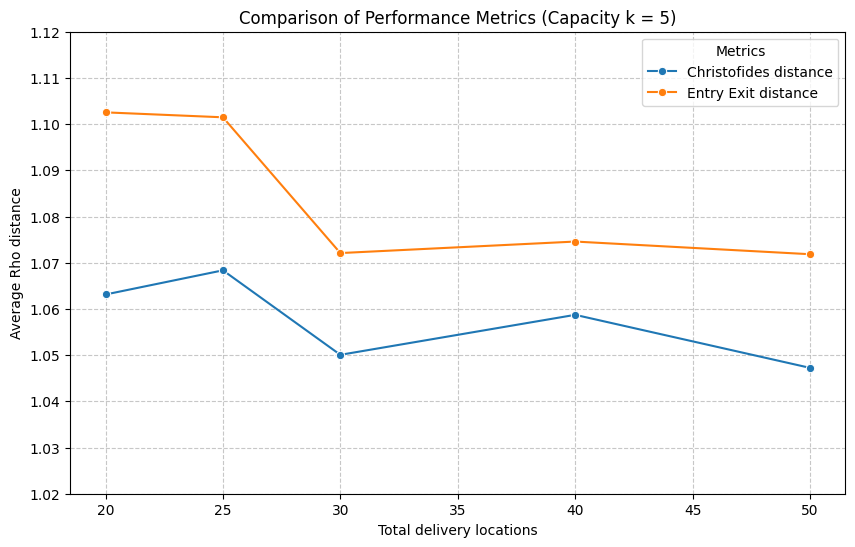

In [15]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_christofides', label='Christofides distance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_greedy', label='Entry Exit distance', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Average Rho distance')
plt.legend(title='Metrics')

plt.yticks(np.arange(1.02, 1.12, step=0.01))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

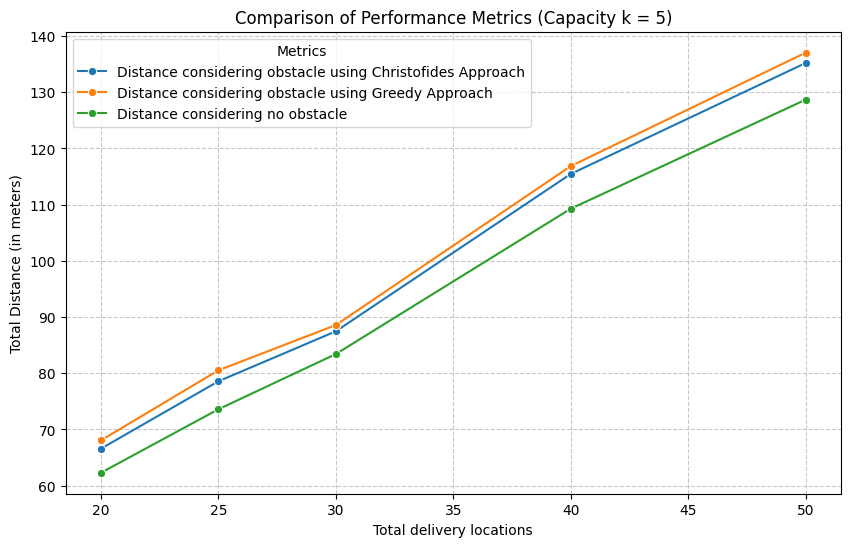

In [16]:
df_cap_5 = df_cap_k[df_cap_k['drone_capacity'] == 5]

plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_5, x='delivary_locations', y='christofides_distance', label='Distance considering obstacle using Christofides Approach',marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='greedy_distance', label='Distance considering obstacle using Greedy Approach', marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='obstacle_free_distance', label='Distance considering no obstacle', marker='o',errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

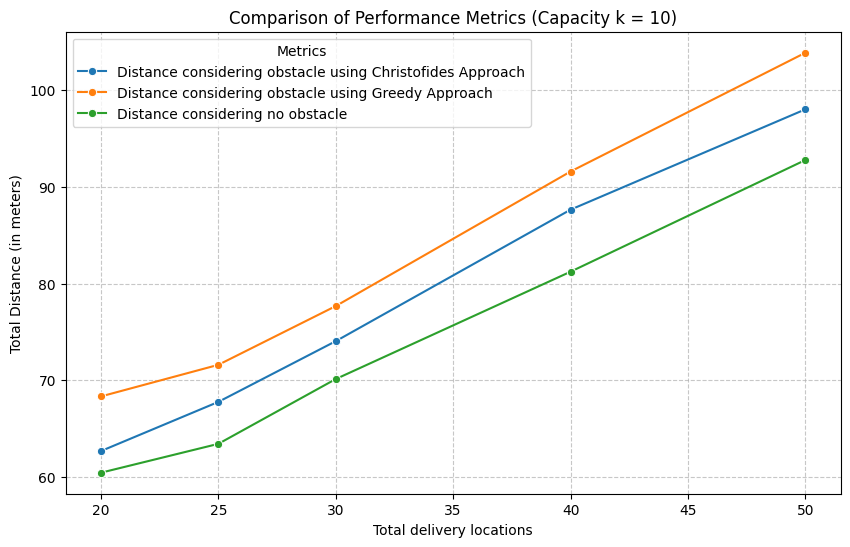

In [17]:
df_cap_10 = df_cap_k[df_cap_k['drone_capacity'] == 10]

plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_10, x='delivary_locations', y='christofides_distance', label='Distance considering obstacle using Christofides Approach',marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='greedy_distance', label='Distance considering obstacle using Greedy Approach', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='obstacle_free_distance', label='Distance considering no obstacle', marker='o',errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 10)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

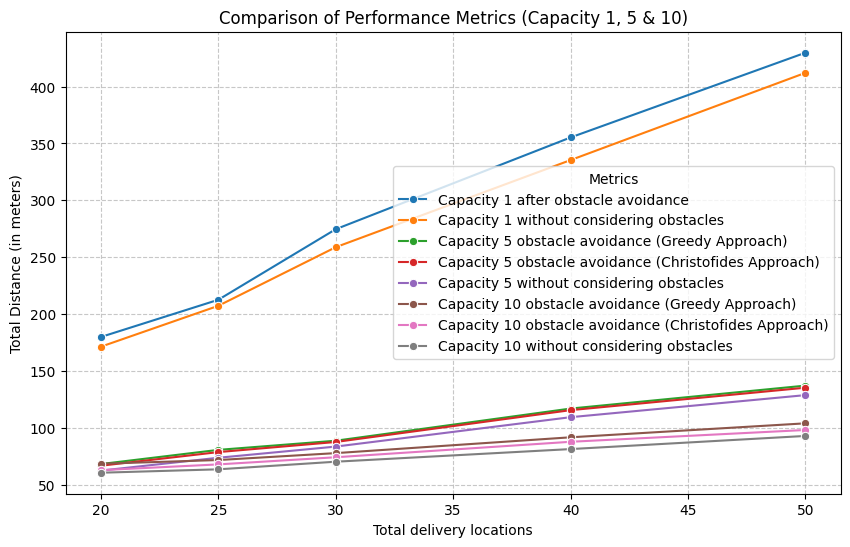

In [18]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_obstacle_avoidance', label='Capacity 1 after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='obstacle_free_distance', label='Capacity 1 without considering obstacles', marker='o', errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='greedy_distance', label='Capacity 5 obstacle avoidance (Greedy Approach)', marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='christofides_distance', label='Capacity 5 obstacle avoidance (Christofides Approach)',marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='obstacle_free_distance', label='Capacity 5 without considering obstacles', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='greedy_distance', label='Capacity 10 obstacle avoidance (Greedy Approach)', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='christofides_distance', label='Capacity 10 obstacle avoidance (Christofides Approach)',marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='obstacle_free_distance', label='Capacity 10 without considering obstacles', marker='o',errorbar=None)


plt.title('Comparison of Performance Metrics (Capacity 1, 5 & 10)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [19]:
# christofides distance
val_1 = df_cap_1['distance_after_obstacle_avoidance'][df_cap_1['delivary_locations'] == 50].mean()
val_2 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_3 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_4 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_5 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_6 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_7 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_8 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
val_25 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

# obstacle free distance
val_9 = df_cap_1['obstacle_free_distance'][df_cap_1['delivary_locations'] == 50].mean()
val_10 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_11 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_12 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_13 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_14 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_15 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_16 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
val_26 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

# greedy distance
val_17 = df_cap_1['distance_after_obstacle_avoidance'][df_cap_1['delivary_locations'] == 50].mean()
val_18 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_19 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_20 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_21 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_22 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_23 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_24 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
val_27 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

data = {
    'capacity' : [1, 2, 3, 4, 5, 6, 8, 10, 12],
    'Distance after obstacle avoidance (Christofides method)' : [val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8, val_25],
    'Obstacle free distance': [val_9, val_10, val_11, val_12, val_13, val_14, val_15, val_16, val_26],
    'Distance after obstacle avoidance (Greedy method)' : [val_17, val_18, val_19, val_20, val_21, val_22, val_23, val_24, val_27],
}

df_final = pd.DataFrame(data)


df_final

,capacity,Distance after obstacle avoidance (Christofides method),Obstacle free distance,Distance after obstacle avoidance (Greedy method)
0,1,429.771850,412.085271,429.771850
1,2,262.992920,248.547976,262.992920
2,3,191.256347,183.689859,191.475205
3,4,155.648853,146.291468,157.133840
4,5,135.207578,128.681630,137.041943
5,6,124.471117,119.087894,126.074657
6,8,110.225701,105.794829,114.136597
7,10,98.025002,92.782775,103.876611
8,12,98.590336,94.892082,102.501196


In [20]:
df_final_1 = df_final[(df_final['capacity'] == 1) | (df_final['capacity'] == 3) | (df_final['capacity'] == 5) | (df_final['capacity'] == 8) | (df_final['capacity'] == 10)]
df_final_2 = df_final[(df_final['capacity'] == 4) | (df_final['capacity'] == 5) |  (df_final['capacity'] == 6) | (df_final['capacity'] == 8) | (df_final['capacity'] == 10)]

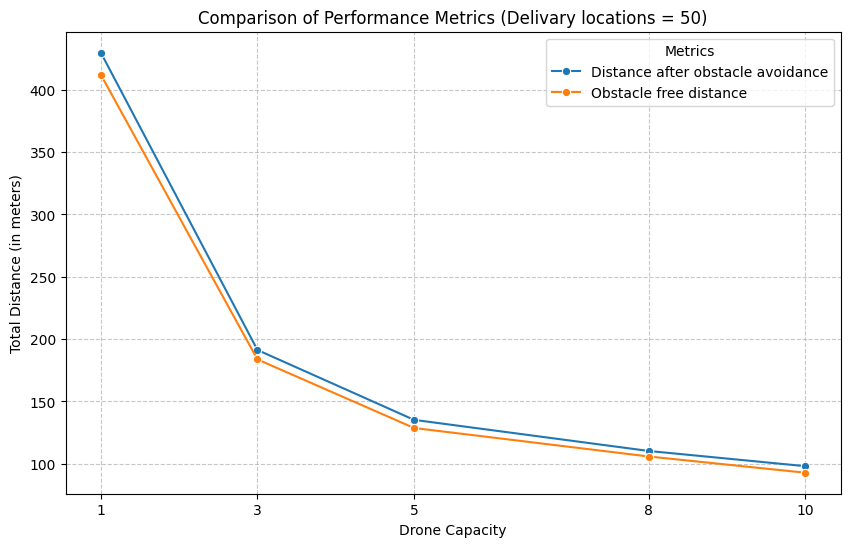

In [21]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_final_1, x='capacity', y='Distance after obstacle avoidance (Christofides method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance")
# sns.lineplot(data=df_final, x='capacity', y='Distance after obstacle avoidance (Greedy method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance (Greedy method)")
sns.lineplot(data=df_final_1, x='capacity', y='Obstacle free distance',marker='o',errorbar=None, label = "Obstacle free distance")

plt.title('Comparison of Performance Metrics (Delivary locations = 50)')
plt.xlabel('Drone Capacity')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.xticks([1,3,5,8,10])

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

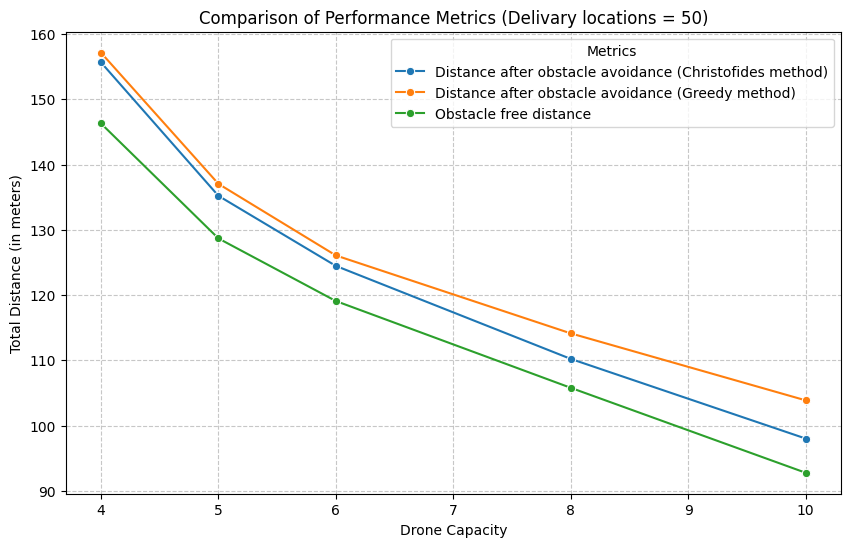

In [24]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_final_2, x='capacity', y='Distance after obstacle avoidance (Christofides method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance (Christofides method)")
sns.lineplot(data=df_final_2, x='capacity', y='Distance after obstacle avoidance (Greedy method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance (Greedy method)")
sns.lineplot(data=df_final_2, x='capacity', y='Obstacle free distance',marker='o',errorbar=None, label = "Obstacle free distance")

plt.title('Comparison of Performance Metrics (Delivary locations = 50)')
plt.xlabel('Drone Capacity')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

# plt.xticks([1,3,5,8,10])

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()